
# Foundations of Machine Learning: An Introduction to Neural Networks & MLPs
This notebook is a tutorial on **Neural Networks**. It starts with the basic building block, the "neuron," and builds its way up to a more powerful model capable of solving complex problems: the **Multi-Layered Perceptron (MLP)**.

At the end is a workshop on classifying handwritten digits from the MNIST dataset.

You will be asked to compare the Keras, PyTorch and TensorFlow implementations in terms of accuracy and speed.

<br/>
<br/>

### 💡 Additional Reading Material

These other tutorials come from the Course Notebooks Repository:

> In-depth: 
[**Multiclass Classification - A Simple Keras Model (MNIST)**](https://github.com/CSCN8010/CSCN8010/blob/main/dl_class_notebooks/03A_minimal_mnist_keras.ipynb)

> In-depth: 
[**Train and Aave a Simple Keras Model (MNIST)**](https://github.com/CSCN8010/CSCN8010/blob/main/dl_class_notebooks/03D_keras_checkpoints_save_model.ipynb)

> In-depth: 
[**Loading a pre-trained Keras model and classifying digits (MNIST)**](https://github.com/CSCN8010/CSCN8010/blob/main/dl_class_notebooks/03B_load_minimal_mnist_model.ipynb)  

<br/>
<br/>

***



### 1. The Inspiration: From Biological to Artificial Neurons

At its core, the field of neural networks is inspired by the human brain. We'll start by understanding the basic concept of a neuron.

#### **Key Concepts: The Neuron**

- An artificial intelligence (AI) system is designed to perceive its environment and act accordingly. 
- Neural networks are the "brain" of these systems.
- The simplest neural network is a **perceptron**, which consists of a single artificial neuron.
- The concept of an artificial neuron is modeled after a biological one.

* A **biological neuron** receives electrical signals through its *dendrites*. If the combined strength of these signals surpasses a certain threshold, the neuron "fires," sending an output signal through its *synapses* to other neurons.
* An **artificial neuron** works similarly. It receives multiple *inputs*, performs a calculation, and if the result exceeds a threshold, it produces an *output*.



### 2. The Perceptron: A Single Neuron in Action

Let's break down the mechanics of that single artificial neuron, the perceptron.

#### **Presentation: Anatomy of a Perceptron**

A perceptron operates on a simple principle: it takes a set of inputs, weighs them based on their importance, sums them up, and then uses an **activation function** to decide whether to "fire" and produce an output.

Here are the key components:

1.  **Inputs ($x$)**: These are the features of your data. For example, if you're predicting a house price, inputs could be the size, number of rooms, and age of the house. Each input is a feature that contributes to the final decision.

2.  **Weights ($w$)**: Not all inputs are equally important. Each input feature ($x_i$) is assigned a weight ($w_i$) that reflects its importance in the decision-making process. A higher weight amplifies an input's effect, while a lower weight diminishes it. The network learns these weights during training.

3.  **Weighted Sum ($z$)**: The neuron calculates the sum of all inputs multiplied by their corresponding weights. We also add a **bias ($b$)**, which is like the y-intercept in a linear equation. It allows us to shift the activation function, giving the model more flexibility. The formula is:
    $$z = (x_1w_1 + x_2w_2 + ... + x_nw_n) + b = \sum_{i=1}^{n} x_i w_i + b$$

4.  **Activation Function ($f(z)$)**: This is the decision-making unit of the neuron. It takes the weighted sum ($z$) as input and transforms it into the final output. For a simple step function, the output is either 0 or 1. This introduces non-linearity, which is crucial for learning complex patterns.



#### **Building a Perceptron with Python**

Let's build a simple perceptron from scratch using NumPy to see these concepts in code. We'll use a simple "step" activation function.


In [1]:

import numpy as np

# A simple perceptron class
class Perceptron:
    """A single neuron model."""

    def __init__(self, num_inputs):
        """
        Initializes the perceptron.
        Args:
            num_inputs (int): The number of input features.
        """
        # Initialize weights with small random numbers. Bias is the last weight.
        self.weights = np.random.rand(num_inputs + 1)
        print(f"Initialized weights: {self.weights}")

    def step_function(self, z):
        """The activation function."""
        return 1 if z >= 0 else 0

    def predict(self, inputs):
        """
        Calculates the weighted sum and passes it to the activation function.
        Args:
            inputs (list or np.array): The input features.
        Returns:
            int: The binary output (0 or 1).
        """
        # Add the bias input (always 1)
        inputs_with_bias = np.append(inputs, 1)

        # Calculate the weighted sum: z = sum(x_i * w_i)
        z = np.dot(inputs_with_bias, self.weights)
        print(f"Inputs (with bias): {inputs_with_bias}")
        print(f"Weighted Sum (z): {z:.4f}")

        # Apply the activation function
        output = self.step_function(z)
        print(f"Output: {output}")
        return output

# --- Let's test our Perceptron! ---
# Create a perceptron that takes 2 inputs
p = Perceptron(num_inputs=2)

# Define some sample inputs
sample_inputs = np.array([0.8, 0.5])

# Make a prediction
prediction = p.predict(sample_inputs)
print(f"\nFinal prediction for inputs {sample_inputs} is: {prediction}")


Initialized weights: [0.7293276  0.6761844  0.17294981]
Inputs (with bias): [0.8 0.5 1. ]
Weighted Sum (z): 1.0945
Output: 1

Final prediction for inputs [0.8 0.5] is: 1



### 3. Activation Functions: Adding Non-Linearity

[cite_start]A single perceptron with a step function can only separate data with a single straight line[cite: 178]. To learn truly complex patterns, like those in images or speech, we need more sophisticated activation functions that introduce **non-linearity**.

#### **Presentation: Common Activation Functions**

While there are many activation functions, three are particularly common and important to know. [cite_start]The PDF specifically mentions **ReLU** and **softmax** as popular choices[cite: 280].

1.  **Sigmoid (or Logistic)**
    * **Formula**: $\sigma(z) = \frac{1}{1 + e^{-z}}$
    * **Output Range**: (0, 1)
    * **Use Case**: Excellent for binary classification problems where the output needs to be a probability.
    * **Downside**: Suffers from the "vanishing gradient" problem, which can slow down learning in deep networks.

2.  **Tanh (Hyperbolic Tangent)**
    * **Formula**: $\tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$
    * **Output Range**: (-1, 1)
    * **Use Case**: Similar to sigmoid but is "zero-centered," which can sometimes help models learn faster.
    * **Downside**: Also suffers from the vanishing gradient problem.

3.  **ReLU (Rectified Linear Unit)**
    * **Formula**: $R(z) = \max(0, z)$
    * **Output Range**: [0, $\infty$)
    * **Use Case**: The most popular activation function for hidden layers in deep learning. It's computationally very efficient and helps mitigate the vanishing gradient problem.
    * **Downside**: Can "die" if a neuron's output consistently becomes zero, preventing weight updates.



#### **Visualizing Activation Functions**

Let's plot these functions to understand their behavior.


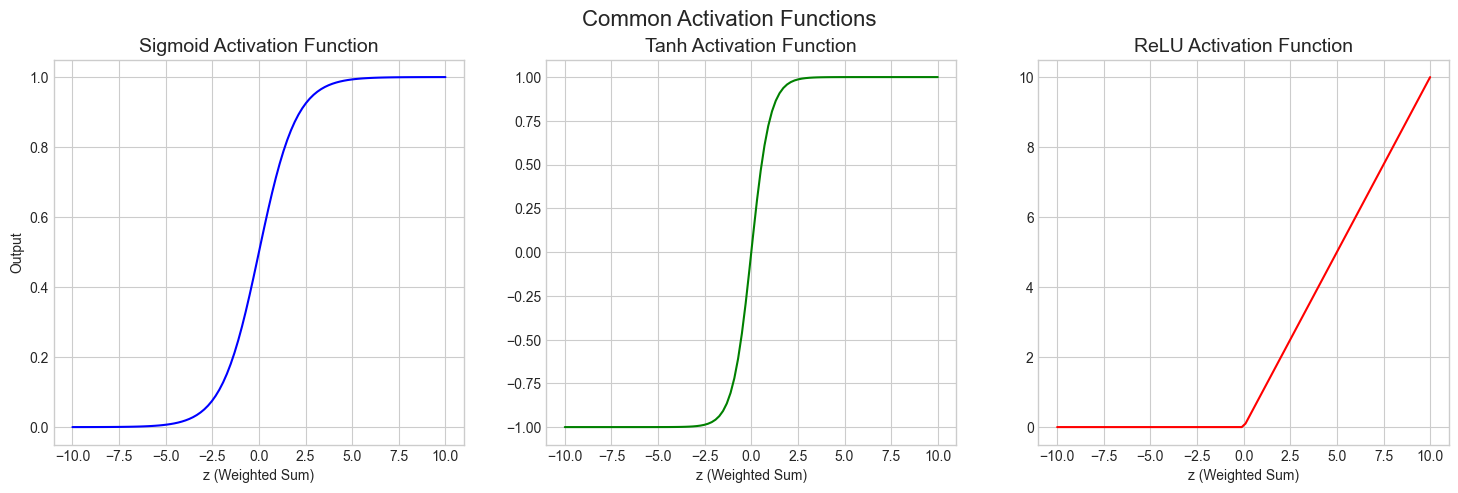

In [2]:

import numpy as np
import matplotlib.pyplot as plt

# Define the input range
z = np.linspace(-10, 10, 100)

# Define the activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

# Plotting
plt.style.use('seaborn-v0_8-whitegrid')
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].plot(z, sigmoid(z), color='blue')
axs[0].set_title('Sigmoid Activation Function', fontsize=14)
axs[0].set_xlabel('z (Weighted Sum)')
axs[0].set_ylabel('Output')

axs[1].plot(z, tanh(z), color='green')
axs[1].set_title('Tanh Activation Function', fontsize=14)
axs[1].set_xlabel('z (Weighted Sum)')

axs[2].plot(z, relu(z), color='red')
axs[2].set_title('ReLU Activation Function', fontsize=14)
axs[2].set_xlabel('z (Weighted Sum)')

plt.suptitle('Common Activation Functions', fontsize=16)
plt.show()



### 4. From One to Many: The Multi-Layer Perceptron (MLP)

A single neuron is limited. To solve complex, **non-linear problems**, we need to combine many neurons into a network.

#### **MLP Architecture**

A very common architecture is to stack neurons in layers. This creates a **Multi-Layer Perceptron (MLP)**. An MLP has three types of layers:

1.  **Input Layer**: This layer receives the initial feature vector. It doesn't perform calculations; it simply passes the data to the first hidden layer.
2.  **Hidden Layers**: These are the layers between the input and output. This is where most of the learning happens. Each neuron in a hidden layer receives outputs from the previous layer, performs the `weighted sum -> activation` calculation, and passes its output to the next layer. Networks with two or more hidden layers are often called **deep neural networks**.
3.  **Output Layer**: This is the final layer that produces the model's prediction. The number of neurons and the activation function in this layer depend on the problem you're solving (e.g., one neuron with a sigmoid for binary classification, or multiple neurons with a softmax function for multi-class classification).

In an MLP, layers are typically **fully connected**, meaning every neuron in one layer is connected to every neuron in the next layer.



### 5. The Learning Process: Feedforward & Backpropagation

How does an MLP actually *learn*? It's a two-part process that is repeated many times: **Feedforward** to make a prediction, and **Backpropagation** to correct errors.

#### **The Learning Loop**

**Step 1: Feedforward (Making a Prediction)**

This is the process of information flowing forward through the network.

1.  The input data is fed into the **input layer**.
2.  The data flows to the first **hidden layer**. Each neuron in this layer calculates its weighted sum and applies its activation function.
3.  The outputs of the first hidden layer become the inputs for the second hidden layer, and so on.
4.  This continues until the data reaches the **output layer**, which produces the final prediction ($y'$).

The entire process is a chain of `weighted sum -> activation` calculations, layer by layer, from input to output.

**Step 2: Backpropagation (Learning from Mistakes)**

Once the network makes a prediction ($y'$), we need to see how good it was.

1.  **Compute Error (Loss)**: We compare the network's prediction ($y'$) with the correct, true label ($y$). The difference is the **error**. We use an **error function** (or loss function) like Mean Squared Error or Cross-Entropy to calculate a single score representing how wrong the model was.
    * **Error Calculation**: `error = y - y'` 

2.  **Propagate Error Backwards**: This is the magic of backpropagation. The error is sent backward through the network, from the output layer to the input layer.

3.  **Update Weights**: As the error propagates back, it's used to calculate how much each weight and bias in the network contributed to the total error. The network then adjusts its weights to reduce the error. For instance, if a large weight led to a large error, the network will decrease that weight. This process uses calculus (specifically, an algorithm called **gradient descent**) to find the optimal weight values that minimize the error.

4.  **Repeat**: This entire `feedforward -> backpropagation` cycle is repeated many times (for many **epochs**) with the entire training dataset. With each cycle, the network's weights get a little bit better, and its predictions become more and more accurate.



### 6. Building an MLP: The Complete Workshop

Now, let's put it all together. We will build, train, and evaluate an MLP to solve a classic machine learning problem: classifying handwritten digits from the MNIST dataset. We'll use the three most popular deep learning libraries: **Keras (with a TensorFlow backend)**, **TensorFlow (Core API)**, and **PyTorch**.

This will show you that while the syntax differs, the core concepts�defining layers, choosing a loss function, and training the model�are universal.

#### **Code Workshop: MNIST Digit Classification**

First, let's load and prepare our data.


In [3]:

import tensorflow as tf
from tensorflow import keras
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

# --- Load and Preprocess Data ---
# Load data for TensorFlow/Keras
(x_train_tf, y_train_tf), (x_test_tf, y_test_tf) = keras.datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train_tf = x_train_tf.astype("float32") / 255.0
x_test_tf = x_test_tf.astype("float32") / 255.0

# Flatten the images from 28x28 to 784-element vectors
x_train_flat = x_train_tf.reshape(-1, 784)
x_test_flat = x_test_tf.reshape(-1, 784)

print(f"TensorFlow/Keras Data Shape: {x_train_flat.shape}")

# Load data for PyTorch
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset_pt = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset_pt = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader_pt = torch.utils.data.DataLoader(train_dataset_pt, batch_size=64, shuffle=True)
test_loader_pt = torch.utils.data.DataLoader(test_dataset_pt, batch_size=64, shuffle=False)

print(f"PyTorch Data Loaded. Number of training batches: {len(train_loader_pt)}")


TensorFlow/Keras Data Shape: (60000, 784)
PyTorch Data Loaded. Number of training batches: 938



#### **Implementation 1: Keras**

Keras is popular due to its simplicity and user-friendly API. 

> Note the time spent training the model. 

- Tweak the hyperparameters to and test their impact on training speed.
- Analyze the training metrics (on the output). What are `val_accuracy` and `val_loss` ?


In [4]:

# --- 1. Define the Keras Model ---
# This is a sequential model, a simple stack of layers.
model_keras = keras.Sequential([
    # Input layer: 784 inputs (our flattened 28x28 image)
    keras.layers.Input(shape=(784,)),
    # Hidden Layer 1: 128 neurons, ReLU activation
    keras.layers.Dense(128, activation='relu'),
    # Hidden Layer 2: 64 neurons, ReLU activation
    keras.layers.Dense(64, activation='relu'),
    # Output Layer: 10 neurons (for digits 0-9), softmax for multi-class probability
    keras.layers.Dense(10, activation='softmax')
])

# Print a summary of the model architecture
model_keras.summary()

# --- 2. Compile the Model ---
# This step configures the model for training.
model_keras.compile(
    optimizer='adam',  # Adam is an efficient optimization algorithm
    loss='sparse_categorical_crossentropy',  # A common loss function for multi-class classification
    metrics=['accuracy']  # We want to monitor the accuracy
)

# --- 3. Train the Model ---
print("\n--- Training Keras Model ---")
history = model_keras.fit(
    x_train_flat,
    y_train_tf,
    batch_size=64,
    epochs=5,  # An epoch is one full pass through the entire training dataset
    validation_split=0.1 # Use 10% of training data for validation
)

# --- 4. Evaluate the Model ---
print("\n--- Evaluating Keras Model ---")
test_loss, test_acc = model_keras.evaluate(x_test_flat, y_test_tf, verbose=2)
print(f"\nKeras Test Accuracy: {test_acc:.4f}")


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)


--- Training Keras Model ---
Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8424 - loss: 0.5440 - val_accuracy: 0.9598 - val_loss: 0.1382
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9625 - loss: 0.1293 - val_accuracy: 0.9693 - val_loss: 0.1007
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9731 - loss: 0.0868 - val_accuracy: 0.9748 - val_loss: 0.0842
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9827 - loss: 0.0580 - val_accuracy: 0.9768 - val_loss: 0.0835
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.9868 - loss: 0.0445 - val_accuracy: 0.9748 - val_loss: 0.0894

--- Evaluating Keras Model ---
313/313 - 4s - 12ms/step - accuracy: 0.9721 - loss: 0.0932

Keras Test Accuracy: 0.9721



#### **Implementation 2: PyTorch**

PyTorch is known for its flexibility and is very popular in research. The structure is more explicit, requiring you to define the model as a class. 

> Note the time spent training the model. 

- Tweak the hyperparameters to and test their impact on training speed.
- Analyze the code. What are `images`, `labels`, `criterion` and `optimizer` ?


In [5]:

# --- 1. Define the PyTorch Model ---
class MLP_PyTorch(nn.Module):
    def __init__(self):
        super(MLP_PyTorch, self).__init__()
        self.flatten = nn.Flatten()
        # Define the sequence of layers
        self.layers = nn.Sequential(
            nn.Linear(28 * 28, 128), # Input -> Hidden 1
            nn.ReLU(),
            nn.Linear(128, 64),      # Hidden 1 -> Hidden 2
            nn.ReLU(),
            nn.Linear(64, 10)        # Hidden 2 -> Output
        )

    def forward(self, x):
        # This defines the feedforward pass
        x = self.flatten(x)
        logits = self.layers(x)
        return logits

model_pt = MLP_PyTorch()
print(model_pt)

# --- 2. Define Loss and Optimizer ---
criterion = nn.CrossEntropyLoss() # Combines LogSoftmax and NLLLoss
optimizer = optim.Adam(model_pt.parameters(), lr=0.001)

# --- 3. Train the Model ---
print("\n--- Training PyTorch Model ---")
model_pt.train() # Set the model to training mode
for epoch in range(5):
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader_pt):
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model_pt(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader_pt):.4f}")

# --- 4. Evaluate the Model ---
print("\n--- Evaluating PyTorch Model ---")
model_pt.eval() # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad(): # We don't need to calculate gradients during evaluation
    for images, labels in test_loader_pt:
        outputs = model_pt(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"PyTorch Test Accuracy: {correct / total:.4f}")


MLP_PyTorch(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

--- Training PyTorch Model ---
Epoch 1, Loss: 0.3809
Epoch 2, Loss: 0.1841
Epoch 3, Loss: 0.1385
Epoch 4, Loss: 0.1135
Epoch 5, Loss: 0.0975

--- Evaluating PyTorch Model ---
PyTorch Test Accuracy: 0.9698



#### **Implementation 3: TensorFlow (Core API)**

This shows how to build a model using the core TensorFlow 2.x API, which is more verbose than Keras but offers more control.

> Note the time spent training the model. 

- Tweak the hyperparameters to and test their impact on training speed.
- Analyze the training metrics (on the output). What are `@tf.function`, `loss_object` and `optimizer_tf` ?


In [6]:

# Using the data we already loaded and flattened for Keras
# Create TensorFlow datasets
train_dataset_tf = tf.data.Dataset.from_tensor_slices((x_train_flat, y_train_tf)).shuffle(60000).batch(64)
test_dataset_tf = tf.data.Dataset.from_tensor_slices((x_test_flat, y_test_tf)).batch(64)

# --- 1. Define the TensorFlow Model ---
class MLP_TensorFlow(tf.keras.Model):
    def __init__(self):
        super(MLP_TensorFlow, self).__init__()
        self.dense1 = tf.keras.layers.Dense(128, activation='relu')
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.dense3 = tf.keras.layers.Dense(10) # Logits output, softmax is in the loss

    def call(self, x):
        x = self.dense1(x)
        x = self.dense2(x)
        return self.dense3(x)

model_tf = MLP_TensorFlow()

# --- 2. Define Loss and Optimizer ---
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer_tf = tf.keras.optimizers.Adam()

# --- 3. Define Training and Test Steps (more explicit than Keras) ---
#  @tf.function is a decorator. It converts regular Python code into an optimized TensorFlow graph
@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        predictions = model_tf(images, training=True)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model_tf.trainable_variables)
    optimizer_tf.apply_gradients(zip(gradients, model_tf.trainable_variables))
    return loss

# --- 4. Train the Model ---
print("\n--- Training TensorFlow Core API Model ---")
for epoch in range(5):
    epoch_loss_avg = tf.keras.metrics.Mean()
    for images, labels in train_dataset_tf:
        loss = train_step(images, labels)
        epoch_loss_avg.update_state(loss)
    print(f"Epoch {epoch+1}, Loss: {epoch_loss_avg.result():.4f}")

# --- 5. Evaluate the Model ---
print("\n--- Evaluating TensorFlow Core API Model ---")
accuracy_metric = tf.keras.metrics.SparseCategoricalAccuracy()
for images, labels in test_dataset_tf:
    predictions = model_tf(images, training=False)
    accuracy_metric.update_state(labels, predictions)

print(f"TensorFlow Core Test Accuracy: {accuracy_metric.result():.4f}")



--- Training TensorFlow Core API Model ---
Epoch 1, Loss: 0.2781
Epoch 2, Loss: 0.1140
Epoch 3, Loss: 0.0806
Epoch 4, Loss: 0.0612
Epoch 5, Loss: 0.0476

--- Evaluating TensorFlow Core API Model ---
TensorFlow Core Test Accuracy: 0.9755


## 🧠 Challenge: Compare the Keras, PyTorch and TensorFlow implementations in terms of accuracy and speed.

Answer the questions posted before each impementation, and use them to produce a table that reveals the differences between the three implementations:

| Framework | Speed | Accuracy | Pros | Cons | 
|----------------|-------------|-------------|-------------|-------------|
| Keras  | 51.3s | 0.9721 | Keras has the power of TensorFlow but said to be more usable |
| PyTorch  | 1 min 1.3s | 0.9698  | More Pythonic, supported by people at major conferences | Significantly slower by my base test
| TensorFlow  | 43.8s | 0.9755  | More adjustable, easier to tune | More complicated, Tensorflow may be less supported - certification was ended and a new edition of Hands-On Machine Learning will use PyTorch

Then use the table to prepare talking points on:
- Which implementation you prefer to use for classifying digits in the MNINST data set, and why?

TensorFlow has the best speed and accuracy per my basic testing, and can be more tweakable, but support may be reducing for this package, as above in the table.

***


### Workshop Summary

Today we covered the essential theory and practice of Multi-Layered Perceptrons.

* **Core Concepts**: We learned that MLPs are inspired by the brain and are built from layers of artificial neurons.
* **Mechanism**: Each neuron performs a `weighted sum -> activation` calculation.
* **Learning**: The network learns through a two-step process of **Feedforward** (to predict) and **Backpropagation** (to correct errors).
* **Implementation**: We saw that while the code syntax for Keras, PyTorch, and TensorFlow is different, the underlying principles of defining, training, and evaluating a model are the same.

You now have a foundational understanding of one of the most important models in machine learning. Great work!
